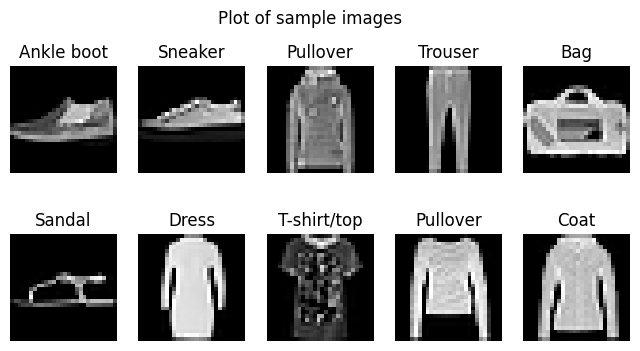

Epoch 1/20
750/750 [==============================] - 5s 5ms/step - loss: 0.7224 - accuracy: 0.7589 - val_loss: 0.4517 - val_accuracy: 0.8391
Epoch 2/20
750/750 [==============================] - 3s 5ms/step - loss: 0.4490 - accuracy: 0.8378 - val_loss: 0.3957 - val_accuracy: 0.8553
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3991 - accuracy: 0.8534 - val_loss: 0.3695 - val_accuracy: 0.8632
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3691 - accuracy: 0.8653 - val_loss: 0.3566 - val_accuracy: 0.8682
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3465 - accuracy: 0.8724 - val_loss: 0.3361 - val_accuracy: 0.8758
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3290 - accuracy: 0.8779 - val_loss: 0.3314 - val_accuracy: 0.8767
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3146 - accuracy: 0.8842 - val_loss: 0.3275 - val_accuracy: 0.8826
Epoch 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf

# Load the Fashion MNIST dataset
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

# Normalize and reshape the predictors
train_x = train_x / 255
test_x = test_x / 255
train_x = train_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)

# Create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Define the labels dictionary
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

# Function to plot sample images
def plot_sample():
    indexes = np.random.randint(0, len(train_x), size=10)
    fig, axes = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(8, 4))
    axes = axes.flatten()

    for i, index in enumerate(indexes):
        axes[i].imshow(train_x[index].reshape(28, 28), cmap="gray")
        axes[i].set_title(f"{labels[train_y[index]]}")
        axes[i].axis("off")
    fig.suptitle("Plot of sample images")
    plt.show()

# Call the plot_sample function
plot_sample()

# Define the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
opt = tf.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=64, validation_data=(val_x, val_y), verbose=1)

# Evaluate the model on the validation dataset
val_predictions = model.predict(val_x)
val_predictions_classes = np.argmax(val_predictions, axis=1)

print("Shape of val_y:", val_y.shape)
print("Shape of val_predictions:", val_predictions.shape)
accuracy = accuracy_score(val_y, val_predictions_classes)
precision = precision_score(val_y, val_predictions_classes, average='weighted')
recall = recall_score(val_y, val_predictions_classes, average='weighted')
f1 = f1_score(val_y, val_predictions_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Evaluate the model on the test dataset
test_predictions = model.predict(test_x)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_accuracy = accuracy_score(test_y, test_predictions_classes)

print(f"Test Accuracy: {test_accuracy}")

# Increase precision for class '5' without changing the model or retraining
# You can adjust the classification threshold for class '5' predictions
class_5_index = 5
threshold = 0.7
class_5_probabilities = model.predict(test_x)
class_5_predictions_adjusted = (class_5_probabilities[:, class_5_index] > threshold).astype(int)

# Increase recall for class '5' without changing the model or retraining
# You can adjust the classification threshold for other classes to improve recall for class '5'
non_class_5_probabilities = np.delete(class_5_probabilities, class_5_index, axis=1)
other_classes_predictions = np.argmax(non_class_5_probabilities, axis=1)
class_5_predictions_recall = (1 - other_classes_predictions).astype(int)

